In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [3]:
dataset = pd.read_csv("/home/smartivity/Documents/ml-100k/u.data",sep='\t',names="user_id,item_id,rating,timestamp".split(","))

In [4]:
dataset.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [5]:
len(dataset.user_id.unique()), len(dataset.item_id.unique())

(943, 1682)

In [6]:
dataset.user_id = dataset.user_id.astype('category').cat.codes.values
dataset.item_id = dataset.item_id.astype('category').cat.codes.values

In [ ]:
dataset.head()

In [7]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(dataset, test_size=0.2)

In [ ]:
train.head()

In [ ]:
test.head()

In [8]:
import keras
from IPython.display import SVG
from keras.optimizers import Adam
from keras.utils.vis_utils import model_to_dot
n_users, n_movies = len(dataset.user_id.unique()),len(dataset.item_id.unique())
n_latent_factors = 3

Using TensorFlow backend.


In [9]:
movie_input = keras.layers.Input(shape=[1],name='Item')
movie_embedding = keras.layers.Embedding(n_movies + 1, n_latent_factors, name='Movie-Embedding')(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)

user_input = keras.layers.Input(shape=[1],name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(n_users + 1, n_latent_factors,name='User-Embedding')(user_input))



In [10]:
prod = keras.layers.dot([movie_vec, user_vec], axes=1)
model = keras.Model([user_input, movie_input], prod)
model.compile('adam', 'mean_squared_error')

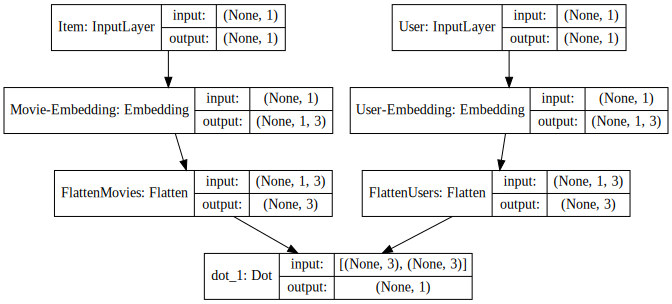

In [11]:
SVG(model_to_dot(model,  show_shapes=True, show_layer_names=True, rankdir='HB').create(prog='dot', format='svg'))

In [12]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
Item (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
User (InputLayer)               (None, 1)            0                                            
__________________________________________________________________________________________________
Movie-Embedding (Embedding)     (None, 1, 3)         5049        Item[0][0]                       
__________________________________________________________________________________________________
User-Embedding (Embedding)      (None, 1, 3)         2832        User[0][0]                       
__________________________________________________________________________________________________
FlattenMov

In [13]:
history = model.fit([train.user_id, train.item_id], train.rating, epochs=100, verbose=0)

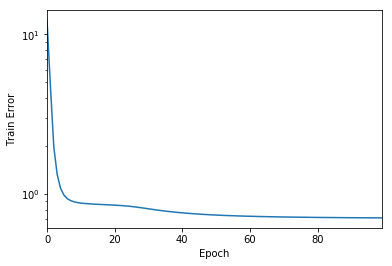

In [14]:
pd.Series(history.history['loss']).plot(logy=True)
plt.xlabel("Epoch")
plt.ylabel("Train Error")
plt.show()